In [26]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [27]:
trainData_file=csv.read_csv('Data/trainData_normalized_nolinks_50k_day02.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp002915,-0.194451,-0.021123,0.037233,0.111681,0.643158,Missing,-0.778207,3.132118,-0.054247,-0.190994,-0.240275,-0.171219,-0.011741,-0.004313,-0.009039,-0.013416,-0.01796,-0.014496
1,ActiveDirectory,Comp003448,-0.201264,-0.023850,0.006155,0.057304,0.641374,Missing,-0.779305,3.132118,-0.053189,-0.190996,-0.240474,-0.172450,-0.011741,-0.004313,-0.009040,-0.013416,-0.01796,-0.014496
2,ActiveDirectory,Comp005774,-0.199559,-0.023914,0.010455,0.057304,0.641820,Missing,-0.779579,3.132118,-0.054776,-0.195034,-0.001442,-0.170273,-0.011741,-0.004312,-0.009040,-0.013416,-0.01796,-0.014496
3,ActiveDirectory,Comp006160,-0.184255,0.016107,0.087407,0.263936,0.645835,Missing,-0.778207,3.132118,-0.054511,-0.197776,-0.240474,-0.175665,-0.011740,-0.004313,-0.009039,-0.013416,-0.01796,-0.014496
4,ActiveDirectory,Comp007324,-0.196159,-0.023231,0.021836,0.122556,0.642712,Missing,-0.780128,3.132118,-0.053982,-0.189891,-0.240275,-0.169376,-0.011741,-0.004313,-0.009039,-0.013416,-0.01796,-0.014496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546394,Comp378365,Comp485524,2.759963,-0.024428,-0.032259,-0.116588,-0.907764,NoLink,-0.780402,-0.335086,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.01796,-0.014496
546395,Comp928022,Comp270144,4.014688,-0.024235,-0.005076,-0.116223,-0.905088,NoLink,-0.779305,-0.308572,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.01796,-0.014496
546396,Comp940027,Comp814131,-0.220008,-0.024536,-0.046039,-0.116702,-2.454673,NoLink,-0.780402,-0.309777,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.01796,-0.014496
546397,Comp203056,Comp644901,-0.220008,-0.024536,-0.046039,-0.116665,-1.424293,NoLink,-0.779854,-0.326649,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.01796,-0.014496


In [28]:
testData_file=csv.read_csv('Data/testData_normalized_nolinks_50k_day02.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,-0.193593,0.049101,0.083163,0.119019,0.714529,Missing,-0.778756,3.992591,-0.054776,-0.197582,-0.223372,-0.175281,-0.011741,-0.004314,-0.009040,-0.013414,-0.017935,-0.014491
1,ActiveDirectory,Comp002524,-0.180437,-0.022161,0.074603,0.365966,0.718098,Missing,-0.777658,3.992591,-0.053453,-0.188428,-0.240275,-0.169382,-0.011741,-0.004313,-0.009039,-0.013416,-0.017960,-0.014496
2,ActiveDirectory,Comp002907,-0.196891,-0.021792,0.025883,0.074120,0.713637,Missing,-0.779854,3.992591,-0.053189,-0.193053,-0.240275,-0.174337,-0.011741,-0.004313,-0.009040,-0.013416,-0.017960,-0.014496
3,ActiveDirectory,Comp003489,-0.191996,-0.021899,0.041370,0.365966,0.714975,Missing,-0.778756,3.992591,-0.053453,-0.197776,-0.240474,-0.175666,-0.011741,-0.004313,-0.009040,-0.013416,-0.017960,-0.014496
4,ActiveDirectory,Comp005115,-0.183711,-0.022376,0.062649,0.264942,0.717206,Missing,-0.780128,3.992591,-0.054776,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.017960,-0.014496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554445,Comp235897,Comp505193,-0.220008,-0.024536,-0.046039,-0.116543,-1.400651,NoLink,-0.777384,-0.331470,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.017960,-0.014496
554446,Comp804839,Comp363110,4.888514,-0.024053,0.009550,-0.115997,-0.868287,NoLink,-0.779579,-0.324239,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.017960,-0.014496
554447,Comp079329,Comp257079,3.355958,-0.024310,-0.040258,-0.116693,-0.873194,NoLink,-0.780128,-0.345932,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.017960,-0.014496
554448,Comp838114,Comp937614,-0.220008,-0.024536,-0.046039,-0.116702,-2.454673,NoLink,-0.780402,-0.336291,-0.055040,-0.197778,-0.240474,-0.175667,-0.011741,-0.004314,-0.009040,-0.013416,-0.017960,-0.014496


In [29]:
X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']


In [30]:
len(training_df2[training_df2["Label"]=="Continuing"])


270005

In [31]:
len(training_df2[training_df2["Label"]=="Missing"])


95542

In [32]:
len(training_df2[training_df2["Label"]=="New"])

130870

In [33]:
len(training_df2[training_df2["Label"]=="NoLink"])

49982

In [34]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

298500

In [35]:
len(testing_df2[testing_df2["Label"]=="Missing"])

102375

In [36]:
len(testing_df2[testing_df2["Label"]=="New"])

103600

In [37]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [38]:
trainData=training_df2.copy()

In [39]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [40]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [41]:
dfc=train_Cont_df.sample(n = 49000)
dfm=train_Miss_df.sample(n = 49000)
dfn=train_New_df.sample(n = 49000)
dfnl=train_NoLink_df.sample(n = 49000)

In [42]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']


Accuracy on the test set: 0.7252231941563712
Confusion Matrix: 
 [[298500      0      0      0]
 [102375      0      0      0]
 [     0      0 103600      0]
 [     0      0  49975      0]]


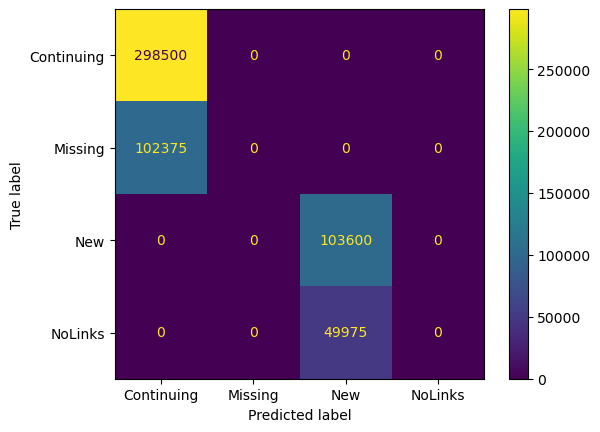

/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Continuing       0.74      1.00      0.85    298500
     Missing       0.00      0.00      0.00    102375
         New       0.67      1.00      0.81    103600
     NoLinks       0.00      0.00      0.00     49975

    accuracy                           0.73    554450
   macro avg       0.35      0.50      0.41    554450
weighted avg       0.53      0.73      0.61    554450



/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


AB_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
AB_clf.fit(X_train_3, y_train_3)
pred_adaboost = AB_clf.predict(X_test)
Adaboost_Accuracy_score=accuracy_score(y_test, pred_adaboost)

print(f"Accuracy on the test set: {Adaboost_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
#print("Sample size for Computer Work   =",(X['Activity']==2).sum())

pred_adaboost = AB_clf.predict(X_test)
cm_adaboost = confusion_matrix(y_test, pred_adaboost)

print('Confusion Matrix: \n', cm_adaboost)

#step 5 Performance Evaluation: Confusion Matrix Visualization
import matplotlib.pyplot as plt

class_names=['Continuing','Missing','New','NoLinks']
from sklearn.metrics import ConfusionMatrixDisplay
AB_disp = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=class_names)
AB_disp.plot(values_format="d")
#disp.plot()
plt.show()

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
AB_report = classification_report(y_test, pred_adaboost, target_names=target_names)
#print(f"Test Score\t {pred}")
print(AB_report)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

XGB = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001, random_state=0)
XGB.fit(X_train_3, y_train_3)
pred_XGB = XGB.predict(X_test)

XGB_Accuracy_score=accuracy_score(y_test, pred_XGB)

print(f"Accuracy on the test set with Gradient_Boosting_Classifier : {XGB_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix

pred_XGB = XGB.predict(X_test)
cm_XGB = confusion_matrix(y_test, pred_XGB)

print('Confusion Matrix: \n', cm_XGB)


# Step 5 Performance Evaluation: 

target_names=['Continuing','Missing', 'New','NoLinks']
XGB_report = classification_report(y_test, pred_XGB, target_names=target_names)
#print(f"Test Score\t {pred}")
print(XGB_report)

Accuracy on the test set with Gradient_Boosting_Classifier : 0.7928181080349896
Confusion Matrix: 
 [[240168  58332      0      0]
 [ 44697  57678      0      0]
 [     0      0  96736   6864]
 [     0      0   4979  44996]]
              precision    recall  f1-score   support

  Continuing       0.84      0.80      0.82    298500
     Missing       0.50      0.56      0.53    102375
         New       0.95      0.93      0.94    103600
     NoLinks       0.87      0.90      0.88     49975

    accuracy                           0.79    554450
   macro avg       0.79      0.80      0.79    554450
weighted avg       0.80      0.79      0.80    554450



In [45]:
#rbf svm classifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Create a pipeline with StandardScaler and SVM with RBF kernel

svc_rbf_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize the features
    ("svm", SVC(kernel='rbf'))   ])  # SVM with RBF kernel

# Fit the pipeline to the training data
svc_rbf_pipeline.fit(X_train_3, y_train_3)


#make predictions on the test_set
pred_rbf_svc = svc_rbf_pipeline.predict(X_test)


rbf_SVC_Accuracy_score=accuracy_score(y_test, pred_rbf_svc)

print(f"Accuracy on the test set with rbf kernel of svm : {rbf_SVC_Accuracy_score}")




# Step 5 Performance Evaluation: Confusion Matrix
cm_rbf_SVC = confusion_matrix(y_test, pred_rbf_svc)
print('Confusion Matrix: \n', cm_rbf_SVC)

# Step 5 Performance Evaluation: 


target_names=['Continuing','Missing', 'New','NoLinks']
rbf_SVC_report = classification_report(y_test, pred_rbf_svc, target_names=target_names)
#print(f"Test Score\t {pred}")
print(rbf_SVC_report)

Accuracy on the test set with rbf kernel of svm : 0.7063973306880692
Confusion Matrix: 
 [[205496  91185   1819      0]
 [ 40927  60331   1117      0]
 [  4459   2119  76482  20540]
 [     2     17    603  49353]]
              precision    recall  f1-score   support

  Continuing       0.82      0.69      0.75    298500
     Missing       0.39      0.59      0.47    102375
         New       0.96      0.74      0.83    103600
     NoLinks       0.71      0.99      0.82     49975

    accuracy                           0.71    554450
   macro avg       0.72      0.75      0.72    554450
weighted avg       0.76      0.71      0.72    554450



In [46]:
#import MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

MLP_clf  = MLPClassifier(random_state=1, max_iter=300)
MLP_clf.fit(X_train_3, y_train_3)
pred_MLP_clf = MLP_clf.predict(X_test)

MLP_clf_Accuracy_score=accuracy_score(y_test, pred_MLP_clf)

print(f"Accuracy on the test set with LinearSVC : {MLP_clf_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix



pred_MLP_clf= MLP_clf.predict(X_test)
cm_MLP_clf = confusion_matrix(y_test, pred_MLP_clf)

print('Confusion Matrix: \n', cm_MLP_clf)

# Step 5 Performance Evaluation: 


target_names=['Continuing','Missing', 'New','NoLinks']
MLP_report= classification_report(y_test, pred_MLP_clf, target_names=target_names)
#print(f"Test Score\t {pred}")
print(MLP_report)

Accuracy on the test set with LinearSVC : 0.7883235638921454
Confusion Matrix: 
 [[269524  28929     45      2]
 [ 65530  36800     43      2]
 [  6094   2525  81934  13047]
 [    18      1   1128  48828]]
              precision    recall  f1-score   support

  Continuing       0.79      0.90      0.84    298500
     Missing       0.54      0.36      0.43    102375
         New       0.99      0.79      0.88    103600
     NoLinks       0.79      0.98      0.87     49975

    accuracy                           0.79    554450
   macro avg       0.78      0.76      0.76    554450
weighted avg       0.78      0.79      0.78    554450



In [47]:
#import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train_3, y_train_3)
pred_LogReg = LogReg.predict(X_test)

LogReg_Accuracy_score=accuracy_score(y_test, pred_LogReg)

print(f"Accuracy on the test set with LogReg : {LogReg_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix


pred_LogReg= LogReg.predict(X_test)
cm_LogReg = confusion_matrix(y_test, pred_LogReg)

print('Confusion Matrix: \n', cm_LogReg)

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
LR_report = classification_report(y_test, pred_LogReg, target_names=target_names)
#print(f"Test Score\t {pred}")
print(LR_report)

/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set with LogReg : 0.670293083235639
Confusion Matrix: 
 [[197354 101061     85      0]
 [ 51923  50439     13      0]
 [  6973   2121  74371  20135]
 [     2     17    476  49480]]
              precision    recall  f1-score   support

  Continuing       0.77      0.66      0.71    298500
     Missing       0.33      0.49      0.39    102375
         New       0.99      0.72      0.83    103600
     NoLinks       0.71      0.99      0.83     49975

    accuracy                           0.67    554450
   macro avg       0.70      0.72      0.69    554450
weighted avg       0.72      0.67      0.69    554450

